In [1]:
#A program which looks at the world's ten worst carbon producers.
#You can specify which of these countries you'd like a look at.
#This program also draws a line plot of CO2 emissions from coal
#burning for your specified country since records began.  It's
#written in Python 3.11, and uses the Seaborn and MatPlotLib
#libraries for plotting

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient
from pprint import pprint

mongo = MongoClient (port = 27017)

C:\Users\edwar\AppData\Local\Temp\ipykernel_13936\1889772932.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Just checking with MongoDB

print (mongo.list_database_names ())

['CO2_emissions', 'admin', 'config', 'local']


In [3]:
db = mongo ['CO2_emissions']

print (db.list_collection_names ())

['CO2_emissions']


In [4]:
pprint (db.CO2_emissions.find_one ())

{'': 0,
 'Country': 'Afghanistan',
 'ISO 3166-1 alpha-3': 'AFG',
 'Total': 0.0,
 'Year': 1750,
 '_id': ObjectId('664d07e5e14b2cdf3a51f225')}


In [5]:
CO2_emissions = pd.read_csv ('C://Users/edwar/Downloads/GCB2022v27_MtCO2_flat.csv')
df = pd.DataFrame (CO2_emissions)

#Cleaning the dataframe

df.dropna (axis = 0, how = 'any', subset = 'Country', inplace = True)
df ['Country'] = df ['Country'].str.replace (r'\W', '', regex = True)

df.to_csv ('C://Users/edwar/Downloads/CO2_emissions.csv')

In [6]:
CO2_emissions = pd.read_csv ('C://Users/edwar/Downloads/CO2_emissions.csv')
df = pd.DataFrame (CO2_emissions)

#Ten worst carbon producers

top_ten = ['China', 'USA', 'India', 'Russia', 'Japan',
           'Indonesia', 'Iran', 'Germany', 'SaudiArabia', 'SouthKorea']

#Printing country emissions from coal burning in 2021

Country = df ['Country']
Year = df ['Year']
Coal = df ['Coal']

top_ten_Coal = [0 for i in range (0, 10)]

print ('Country', 'Emissions from coal in 2021 (MtCO2)')

for j in range (0, 10):
    for i in range (0, len (df)):
        if Year [i] == 2021:
            if Country [i] == top_ten [j]:
                top_ten_Coal [j] = Coal [i]
                print (top_ten [j], Coal [i])
                
df1 = pd.DataFrame ({'Country': top_ten, 'Emissions from Coal Burning (MtCO2)': top_ten_Coal})

Country Emissions from coal in 2021 (MtCO2)
China 7955.985419
USA 1002.299987
India 1802.311897
Russia 380.227147
Japan 418.820499
Indonesia 303.153575
Iran 3.729952
Germany 230.221049
SaudiArabia 0.0
SouthKorea 283.908353


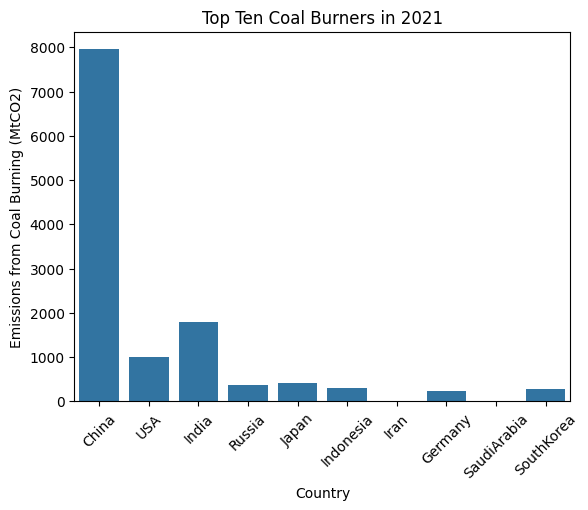

In [7]:
#Drawing bar chart of these findings using Seaborn and MatPlotLib

sns.barplot (x = 'Country', y = 'Emissions from Coal Burning (MtCO2)', data = df1).set (title = 'Top Ten Coal Burners in 2021')
plt.xticks (rotation = 45)
plt.show ()

In [8]:
Country_Year = [2022 for i in range (1904, 2022)]
Country_Coal = [0 for i in range (1904, 2022)]

rest_of_world = 0

country_of_interest = input ('Which country are you interested in?')
if country_of_interest == 'China':
    start_year = 1960
elif country_of_interest == 'USA':
    start_year = 1904
else:
    start_year = 1990

#Printing emissions from coal burning from the ten worst since records began,
#plus total contribution from the rest of the world.  The latter seems
#to change depending on which country you input, but the average is
#44 519 547.08 MtCO2, which gives you an idea of the order.

print ('Year', 'Emissions from burning coal (MtCO2)')
for j in range (0, 10):
    if country_of_interest == top_ten [j]:
        for i in range (0, len (df)):
            if Country [i] == country_of_interest:
                print (Year [i], Coal [i])
                k = Year [i] - start_year
                if Year [i] >= 1904:
                    Country_Year [k] = Year [i]
                    Country_Coal [k] = Coal [i]
            else:
                rest_of_world = rest_of_world + Country_Coal [2021 - start_year]
print ('\nRest of the world in 2021', rest_of_world, 'MtCO2')

df1 = pd.DataFrame ({'Year': Country_Year, 'Emissions from Burning Coal (MtCO2)': Country_Coal})

Year Emissions from burning coal (MtCO2)
1750 nan
1751 nan
1752 nan
1753 nan
1754 nan
1755 nan
1756 nan
1757 nan
1758 nan
1759 nan
1760 nan
1761 nan
1762 nan
1763 nan
1764 nan
1765 nan
1766 nan
1767 nan
1768 nan
1769 nan
1770 nan
1771 nan
1772 nan
1773 nan
1774 nan
1775 nan
1776 nan
1777 nan
1778 nan
1779 nan
1780 nan
1781 nan
1782 nan
1783 nan
1784 nan
1785 nan
1786 nan
1787 nan
1788 nan
1789 nan
1790 nan
1791 nan
1792 nan
1793 nan
1794 nan
1795 nan
1796 nan
1797 nan
1798 nan
1799 nan
1800 0.252816
1801 0.267472
1802 0.289456
1803 0.296784
1804 0.333424
1805 0.340752
1806 0.333424
1807 0.377392
1808 0.392048
1809 0.40304
1810 0.417696
1811 0.447008
1812 0.483648
1813 0.520288
1814 0.560592
1815 0.600896
1816 0.663184
1817 0.718144
1818 0.780432
1819 0.762112
1820 0.791424
1821 0.828064
1822 0.864704
1823 0.901344
1824 1.014928
1825 1.13584
1826 1.315376
1827 1.44728
1828 1.59384
1829 1.79536
1830 2.08848
1831 2.264352
1832 3.0228
1833 3.528432
1834 3.381872
1835 4.316192
1836 4.730224

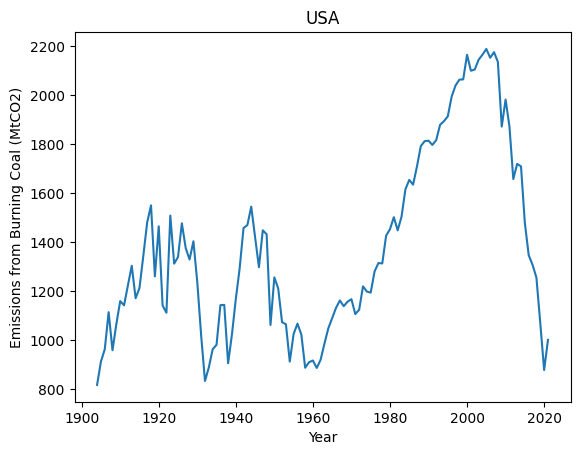

In [9]:
#Drawing a line plot of emissions from coal burning for the country of interest

sns.lineplot (x = 'Year', y = 'Emissions from Burning Coal (MtCO2)', data = df1).set (title = country_of_interest)
plt.show ()